In [44]:
import tensorflow as tf
keras = tf.keras
from keras.layers import SimpleRNN, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from keras import Sequential, Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1
### A

In [2]:
def gen_time_series(sample_size: int, n_steps: int):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)

    return series[..., np.newaxis].astype(np.float32)

In [3]:
data = gen_time_series(10000, 51)

In [4]:
data[0]

array([[-0.19207342],
       [-0.17525306],
       [-0.1815216 ],
       [-0.22039606],
       [-0.12343376],
       [-0.08581077],
       [ 0.17670955],
       [ 0.4084893 ],
       [ 0.5380089 ],
       [ 0.659116  ],
       [ 0.7142563 ],
       [ 0.58313876],
       [ 0.39349225],
       [ 0.16831467],
       [ 0.06830373],
       [-0.08398375],
       [-0.0411288 ],
       [-0.10121907],
       [-0.12894028],
       [-0.17277212],
       [-0.3488574 ],
       [-0.42891318],
       [-0.5649305 ],
       [-0.6568419 ],
       [-0.62875456],
       [-0.41220278],
       [-0.18285133],
       [ 0.00484179],
       [ 0.19324917],
       [ 0.3237057 ],
       [ 0.36699268],
       [ 0.2913023 ],
       [ 0.30983433],
       [ 0.332467  ],
       [ 0.3181533 ],
       [ 0.47357017],
       [ 0.53559434],
       [ 0.55582786],
       [ 0.462842  ],
       [ 0.22962232],
       [ 0.00897526],
       [-0.23376514],
       [-0.42377013],
       [-0.49744326],
       [-0.51802593],
       [-0

In [5]:
X = data[:, 0:50]
X

array([[[-0.19207342],
        [-0.17525306],
        [-0.1815216 ],
        ...,
        [-0.27118856],
        [-0.24353215],
        [-0.33677945]],

       [[ 0.48854834],
        [ 0.23283596],
        [-0.00730349],
        ...,
        [-0.4530908 ],
        [-0.5089068 ],
        [-0.5753812 ]],

       [[-0.5506837 ],
        [-0.55035186],
        [-0.49812248],
        ...,
        [ 0.3811657 ],
        [ 0.24647099],
        [ 0.15311971]],

       ...,

       [[-0.59032387],
        [-0.6461003 ],
        [-0.6593416 ],
        ...,
        [ 0.6260169 ],
        [ 0.5046025 ],
        [ 0.41829357]],

       [[ 0.20745422],
        [ 0.16865458],
        [ 0.14276183],
        ...,
        [ 0.24837051],
        [ 0.2648372 ],
        [ 0.24920222]],

       [[-0.56470513],
        [-0.29233664],
        [ 0.00693571],
        ...,
        [-0.26561105],
        [-0.24966209],
        [-0.10444074]]], dtype=float32)

In [6]:
y = data[:, -1]
y

array([[-0.29666665],
       [-0.5548032 ],
       [-0.02663113],
       ...,
       [ 0.13580354],
       [ 0.21837582],
       [-0.02939698]], dtype=float32)

### B

In [7]:
X_train, X_val, X_test = X[0:7000, :], X[7000:9000, :], X[9000:10000, :]
X_val.shape

(2000, 50, 1)

In [8]:
y_train, y_val, y_test = y[0:7000, :], y[7000:9000, :], y[9000:10000, :]

In [9]:
y_train.shape

(7000, 1)

### C
#### a


In [10]:
fcnn_model = Sequential([
    Flatten(input_shape=[50, 1]),
    Dense(1)
])
fcnn_model.summary()

2023-08-31 20:53:00.871657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-31 20:53:02.095202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-31 20:53:02.095289: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-31 20:53:02.132795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-31 20:53:02.132893: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
fcnn_model.compile(loss="mse", optimizer="adam")

In [12]:
fcnn_hist = fcnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20


2023-08-31 20:53:05.674506: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3ff40d1330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-31 20:53:05.674584: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-08-31 20:53:06.238538: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-31 20:53:06.528970: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-31 20:53:07.436029: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


  1/219 [..............................] - ETA: 13:09 - loss: 0.6989

2023-08-31 20:53:07.908476: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 [==============================] - 5s 8ms/step - loss: 0.1789 - val_loss: 0.0656
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0459 - val_loss: 0.0349
Epoch 3/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0285 - val_loss: 0.0251
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0216 - val_loss: 0.0201
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0177 - val_loss: 0.0169
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0150 - val_loss: 0.0145
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0130 - val_loss: 0.0126
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 10/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 11/

In [13]:
fcnn_model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.0038


0.0037785314489156008

#### b

In [14]:
rnn1_model = Sequential([
    Input((50, 1)),
    SimpleRNN(1)
])
rnn1_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
rnn1_model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])

In [16]:
rnn1_hist = rnn1_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
219/219 [==============================] - 24s 103ms/step - loss: 0.0181 - accuracy: 0.0000e+00 - val_loss: 0.0143 - val_accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 22s 102ms/step - loss: 0.0125 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 22s 100ms/step - loss: 0.0115 - accuracy: 0.0000e+00 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 22s 101ms/step - loss: 0.0113 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 22s 102ms/step - loss: 0.0113 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 22s 102ms/step - loss: 0.0113 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 23s 106ms/step - loss: 0.011

In [17]:
rnn1_model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 15ms/step - loss: 0.0111 - accuracy: 0.0000e+00


[0.011060044169425964, 0.0]

#### c,d

In [18]:
rnn2_model = Sequential([
    Input((50, 1)),
    SimpleRNN(1, return_sequences=True),
    SimpleRNN(1)
])
rnn2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
rnn2_model.compile(loss="mse", optimizer="adam")

In [20]:
rnn2_hist = rnn2_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
219/219 [==============================] - 55s 241ms/step - loss: 0.1444 - val_loss: 0.1438
Epoch 2/20
219/219 [==============================] - 53s 243ms/step - loss: 0.1414 - val_loss: 0.1451
Epoch 3/20
219/219 [==============================] - 52s 238ms/step - loss: 0.1403 - val_loss: 0.1442
Epoch 4/20
219/219 [==============================] - 52s 239ms/step - loss: 0.1403 - val_loss: 0.1424
Epoch 5/20
219/219 [==============================] - 52s 236ms/step - loss: 0.1405 - val_loss: 0.1427
Epoch 6/20
219/219 [==============================] - 52s 237ms/step - loss: 0.1406 - val_loss: 0.1439
Epoch 7/20
219/219 [==============================] - 51s 233ms/step - loss: 0.1403 - val_loss: 0.1425
Epoch 8/20
219/219 [==============================] - 50s 229ms/step - loss: 0.1403 - val_loss: 0.1423
Epoch 9/20
219/219 [==============================] - 52s 235ms/step - loss: 0.1407 - val_loss: 0.1422
Epoch 10/20
219/219 [==============================] - 51s 231ms/step - l

In [21]:
rnn2_model.evaluate(X_test, y_test)

32/32 [==============================] - 1s 21ms/step - loss: 0.1391


0.1390729397535324

#### e

In [22]:
rnn3_model = Sequential([
    Input((50, 1)),
    SimpleRNN(1, return_sequences=True),
    SimpleRNN(1, return_sequences=True),
    SimpleRNN(1)
])
rnn3_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
rnn3_model.compile(loss="mse", optimizer="adam")

In [24]:
rnn3_hist = rnn3_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
219/219 [==============================] - 79s 347ms/step - loss: 0.1529 - val_loss: 0.1490
Epoch 2/20
219/219 [==============================] - 75s 345ms/step - loss: 0.1452 - val_loss: 0.1474
Epoch 3/20
219/219 [==============================] - 76s 349ms/step - loss: 0.1439 - val_loss: 0.1460
Epoch 4/20
219/219 [==============================] - 74s 338ms/step - loss: 0.1430 - val_loss: 0.1451
Epoch 5/20
219/219 [==============================] - 73s 336ms/step - loss: 0.1425 - val_loss: 0.1448
Epoch 6/20
219/219 [==============================] - 80s 367ms/step - loss: 0.1423 - val_loss: 0.1447
Epoch 7/20
219/219 [==============================] - 78s 353ms/step - loss: 0.1421 - val_loss: 0.1447
Epoch 8/20
219/219 [==============================] - 76s 349ms/step - loss: 0.1422 - val_loss: 0.1441
Epoch 9/20
219/219 [==============================] - 77s 351ms/step - loss: 0.1420 - val_loss: 0.1440
Epoch 10/20
219/219 [==============================] - 76s 345ms/step - l

In [25]:
rnn3_model.evaluate(X_test, y_test)

32/32 [==============================] - 1s 38ms/step - loss: 0.1378


0.1378369927406311

## Q2

In [26]:
df = pd.read_csv('GOOG.csv')

In [27]:
df.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [30]:
# Check null
df.isna().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [32]:
# Check duplicates
df.duplicated().any()

False

### A

In [34]:
# Filter data for the years 2020 and 2021
df['date'] = pd.to_datetime(df['date'])
df_2020_2021 = df[(df['date'].dt.year >= 2020) & (df['date'].dt.year <= 2021)]

In [35]:
features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
df_selected = df_2020_2021[features]

In [37]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_selected)

In [38]:
window_size = 30

sequences = []
target = []
for i in range(len(df_norm) - window_size):
    sequences.append(df_norm[i:i+window_size])
    target.append(df_norm[i+window_size])

sequences = np.array(sequences)
target = np.array(target)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size=0.2, random_state=42)

In [41]:
model = Sequential([
    SimpleRNN(units=64, activation='relu', return_sequences=True, input_shape=(window_size, len(features))),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=len(features))
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 30, 64)            4800      
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 30, 64)            8256      
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 30, 64)            8256      
                                                                 
 dropout_2 (Dropout)         (None, 30, 64)            0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 64)               

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.1)

Epoch 1/50
8/8 [==============================] - 10s 386ms/step - loss: 0.1901 - val_loss: 0.0686
Epoch 2/50
8/8 [==============================] - 3s 317ms/step - loss: 0.0787 - val_loss: 0.0502
Epoch 3/50
8/8 [==============================] - 2s 307ms/step - loss: 0.0517 - val_loss: 0.0343
Epoch 4/50
8/8 [==============================] - 3s 332ms/step - loss: 0.0411 - val_loss: 0.0286
Epoch 5/50
8/8 [==============================] - 2s 291ms/step - loss: 0.0368 - val_loss: 0.0284
Epoch 6/50
8/8 [==============================] - 3s 332ms/step - loss: 0.0325 - val_loss: 0.0231
Epoch 7/50
8/8 [==============================] - 2s 308ms/step - loss: 0.0288 - val_loss: 0.0235
Epoch 8/50
8/8 [==============================] - 2s 294ms/step - loss: 0.0254 - val_loss: 0.0235
Epoch 9/50
8/8 [==============================] - 2s 302ms/step - loss: 0.0268 - val_loss: 0.0182
Epoch 10/50
8/8 [==============================] - 3s 387ms/step - loss: 0.0220 - val_loss: 0.0189
Epoch 11/50
8/8 [=

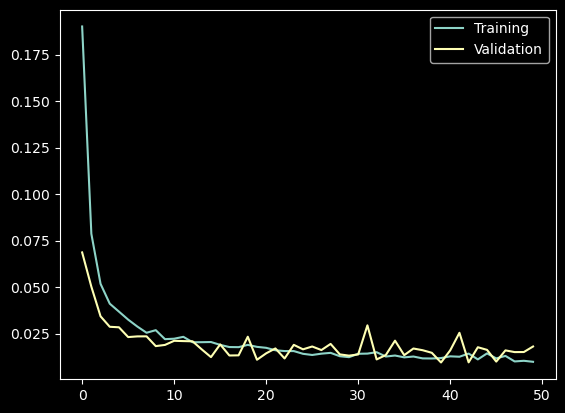

In [46]:
training = hist.history['loss']
validation = hist.history['val_loss']

plt.plot(training, label='Training')
plt.plot(validation, label='Validation')
plt.legend()
plt.show()

In [48]:
predicted_prices = model.predict(X_test)
predicted_prices_actual = scaler.inverse_transform(predicted_prices)

1/3 [=========>....................] - ETA: 0s

3/3 [==============================] - 0s 33ms/step


### B

In [51]:
mape = mean_absolute_percentage_error(y_test, predicted_prices)
print(f"MAPE: {mape:.2f}%")

mse = mean_squared_error(y_test, predicted_prices)
print(f"MSE: {mse:.2f}")

MAPE: 2347375212097.97%
MSE: 0.02


### C

Good results were seen with 50 epochs and 4 dropouts

### D

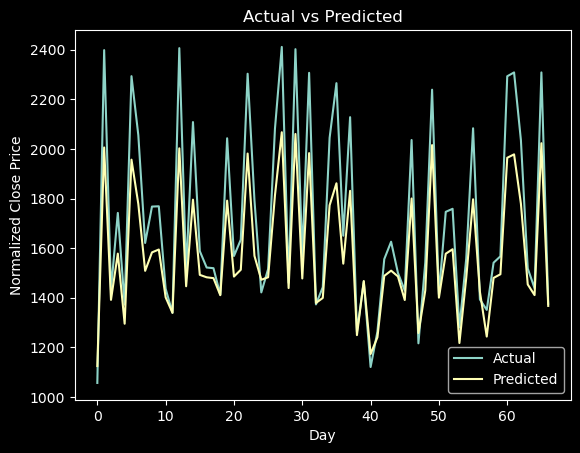

In [54]:
actual_price = scaler.inverse_transform(y_test)

plt.plot(actual_price[:, 0], label='Actual')
plt.plot(predicted_prices_actual[:, 0], label='Predicted')

plt.xlabel('Day')
plt.ylabel('Normalized Close Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()